# Exploratory Data Visualization
***Due to shear number of features and interations, I created a separate notebook for visualizing and getting a feel for the data***


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import dtale
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [28]:
df = pd.read_pickle('cleaned_full_dataframe.pkl')

===============================================================================================================
## Exploratory Plotting


In [29]:
dfe1 = df.copy()

### 1. Price Spread

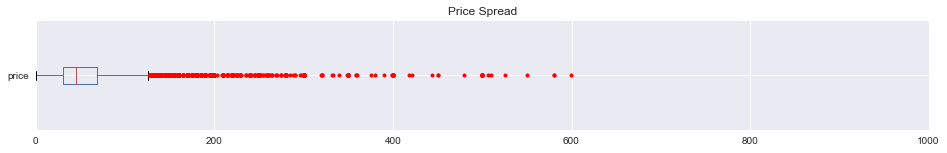

In [122]:
#Look at the Price Distribution. Shows 75% of the prices are below $150
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
dfe1['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2), title='Price Spread');

### 2. Cash Flow vs. Apartment Time and Distance

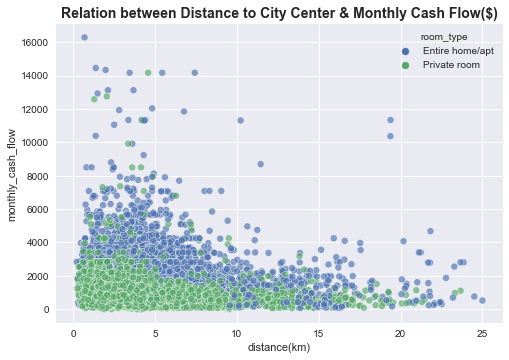

In [37]:
sns.scatterplot(x="distance(km)", y="monthly_cash_flow", data=dfe1, hue='room_type', alpha=.65)
#dfe1[dfe1['room_type']=='Private room'].plot.scatter(x="distance(km)", y="monthly_cash_flow", figsize=(9,6), c='dimgrey')
plt.title('Relation between Distance to City Center & Monthly Cash Flow($)', fontsize=14, fontweight='bold');

### 3. Metrics by different Neighborhoods

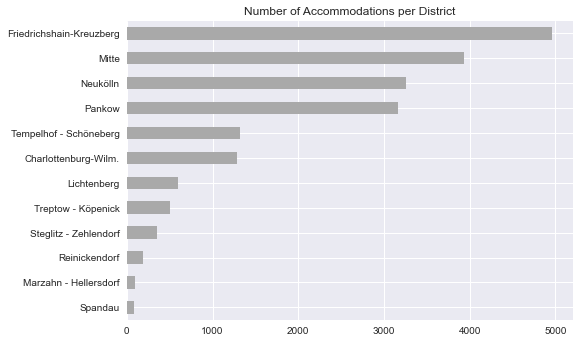

In [33]:
dfe1['neighbourhood_group_cleansed'].value_counts().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Number of Accommodations per District');

Text(0.5, 1.0, 'Monthly Cash Flow per District')

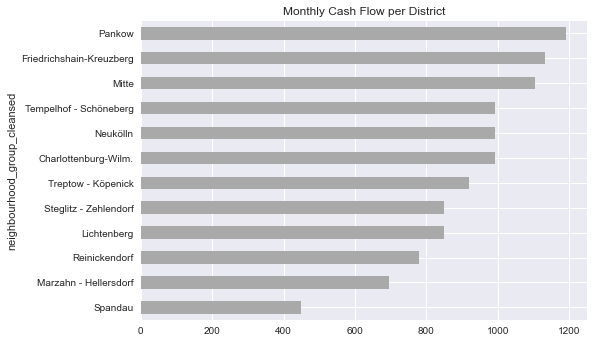

In [34]:
dfe1.groupby('neighbourhood_group_cleansed')['monthly_cash_flow'].median().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Monthly Cash Flow per District')

Text(0.5, 1.0, 'daily_rentals per District')

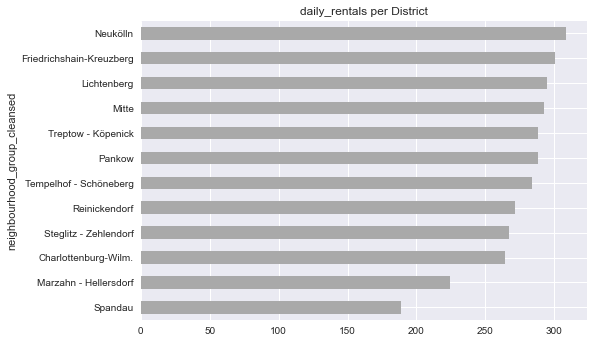

In [35]:
dfe1.groupby('neighbourhood_group_cleansed')['days_rented'].mean().sort_values().plot(kind='barh', color='darkgrey')
plt.title('daily_rentals per District')

Text(0.5, 1.0, 'Distance from Center per District')

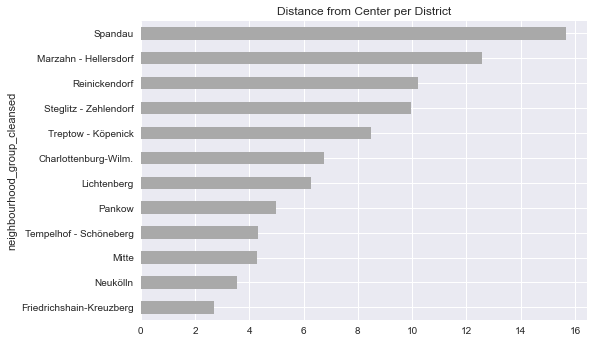

In [36]:
dfe1.groupby('neighbourhood_group_cleansed')['distance(km)'].mean().sort_values().plot(kind='barh', color='darkgrey')
plt.title('Distance from Center per District')

In [108]:
plot_areas = ['Mitte', 'Pankow', 'Tempelhof - Schöneberg',
       'Friedrichshain-Kreuzberg', 'Neukölln', 'Charlottenburg-Wilm.']
df_plot = dfe1[(dfe1['neighbourhood_group_cleansed'].isin(plot_areas)) & 
              (dfe1['beds']< 11)]

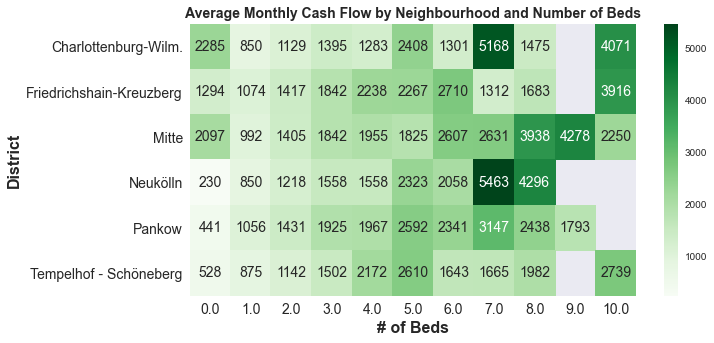

In [128]:
plt.figure(figsize=(10,5))
sns.heatmap(df_plot.groupby(['neighbourhood_group_cleansed', 'beds']).monthly_cash_flow.median().unstack(), 
            cmap='Greens', annot=True, fmt=".0f", annot_kws={"size":14})

plt.xlabel('# of Beds', fontsize=16, weight='bold')
plt.ylabel('District', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Monthly Cash Flow by Neighbourhood and Number of Beds', fontsize=14, fontweight='bold');

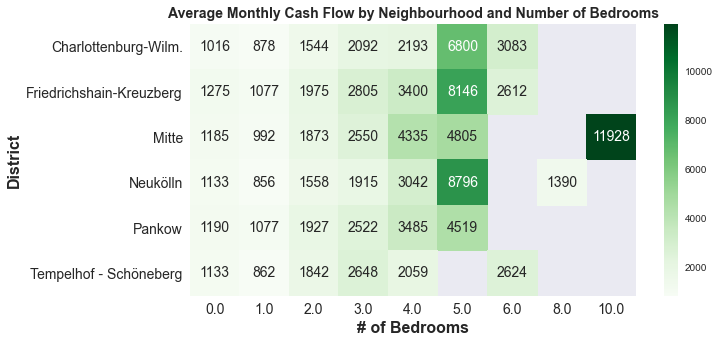

In [127]:
plt.figure(figsize=(10,5))
sns.heatmap(df_plot.groupby(['neighbourhood_group_cleansed', 'bedrooms']).monthly_cash_flow.median().unstack(), 
            cmap='Greens', annot=True, fmt=".0f", annot_kws={"size":14})

plt.xlabel('# of Bedrooms', fontsize=16, weight='bold')
plt.ylabel('District', fontsize=16, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Average Monthly Cash Flow by Neighbourhood and Number of Bedrooms', fontsize=14, fontweight='bold');

### 4. Effects of Accommodation/Price and Listing Size on Cash Flow

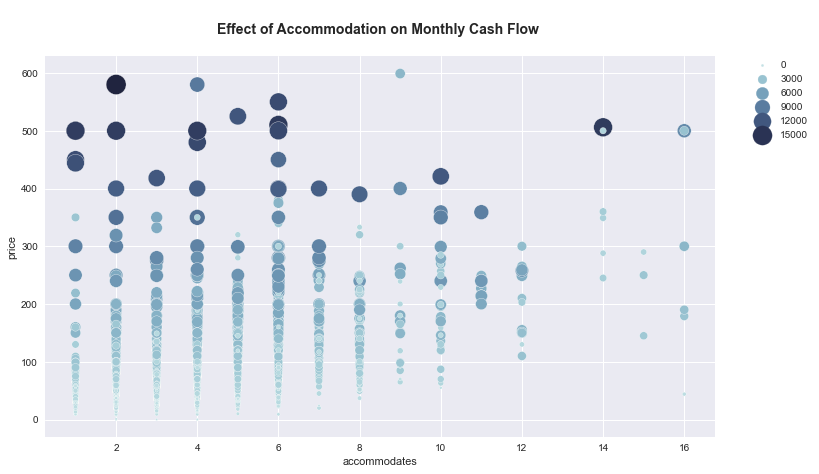

In [125]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

fig, ax = plt.subplots(figsize=(12,7))
ax = sns.scatterplot(x="accommodates", y="price", sizes=(5, 400), size='monthly_cash_flow', hue='monthly_cash_flow',
                      palette=cmap,  data=df)

plt.title('\nEffect of Accommodation on Monthly Cash Flow \n', fontsize=14, fontweight='bold')

# putting legend out of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

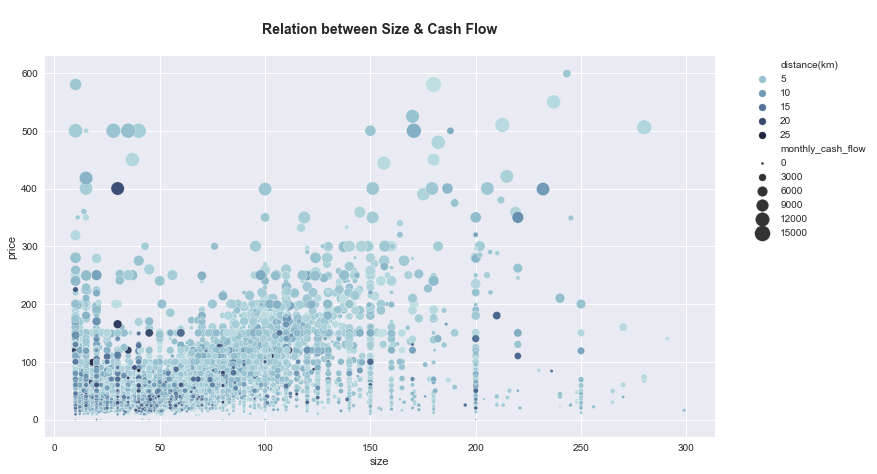

In [124]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

fig, ax = plt.subplots(figsize=(12,7))
ax = sns.scatterplot(x="size", y="price", sizes=(5, 250), size='monthly_cash_flow', hue='distance(km)', 
                      palette=cmap,  data=dfe1)

plt.title('\nRelation between Size & Cash Flow\n', fontsize=14, fontweight='bold')

# putting legend out of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

### 5.  Just for Fun. Using Maps to display certain information

In [43]:
import folium
from folium.plugins import MarkerCluster

In [44]:
locs = dfe1[['latitude', 'longitude']]
locs_list = locs.values.tolist()
shortened_locs = locs_list[:1000]
#Define coordinates of map center
berlin_coords = [52.543157, 13.415091]
my_map = folium.Map(location = berlin_coords, zoom_start=12)


# Add points to the map
for point in range(0, len(shortened_locs)):
    folium.Circle(shortened_locs[point], 
                  popup=dfe1.iloc[point][['price', 'room_type', 'accommodates']],
                  radius=dfe1.iloc[point]['monthly_cash_flow']/100,
                  color='#00933C',
                  weight =1, 
                  fill=True,
                  fill_color='red'
                 ).add_to(my_map)

my_map

In [45]:
berlin_lat = dfe1.latitude.mean()
berlin_long = dfe1.longitude.mean()
colors = ["#3333DD", "#B00000"]

In [46]:
berlin_map = folium.Map(location=[berlin_lat, berlin_long], zoom_start=11)

belin_boroughs = "https://raw.githubusercontent.com/funkeinteraktiv/Berlin-Geodaten/master/berlin_bezirke.geojson"
berlin_price = dfe1.groupby(by="neighbourhood_group_cleansed").median().reset_index()

folium.Choropleth(
    geo_data=belin_boroughs,
    name='choropleth',
    data=berlin_price,
    columns=['neighbourhood_group_cleansed', 'monthly_cash_flow'],
    key_on='feature.properties.name',
    fill_color='RdBu_r',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend = "Median Price (Euro)"
).add_to(berlin_map)

folium.LayerControl().add_to(berlin_map)

berlin_map